In [9]:
import pandas as pd
import openai, groq
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from enum import Enum
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from pydantic import BaseModel #This is used for data validation and settings management using Python type annotations. In simply words, it is used to define data models with validation rules. cuz lllms not processing data, they are not good at it. so we use pydantic to validate the data before sending it to the llm

In [5]:
df = pd.read_csv('processed/CEHHbInToW_imputed.csv')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.000000,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.000000,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.000000,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.912128,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.000000,2,125510.82,1,1,1,79084.10,0


In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Outlier detection techniques

1. Distribution plots

In [ ]:
# df['Gender'] = df['Gender'].apply(lambda x: 1 if x ==="Male" else 0)

In [12]:
categorical_columns = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary','NumOfProducts']

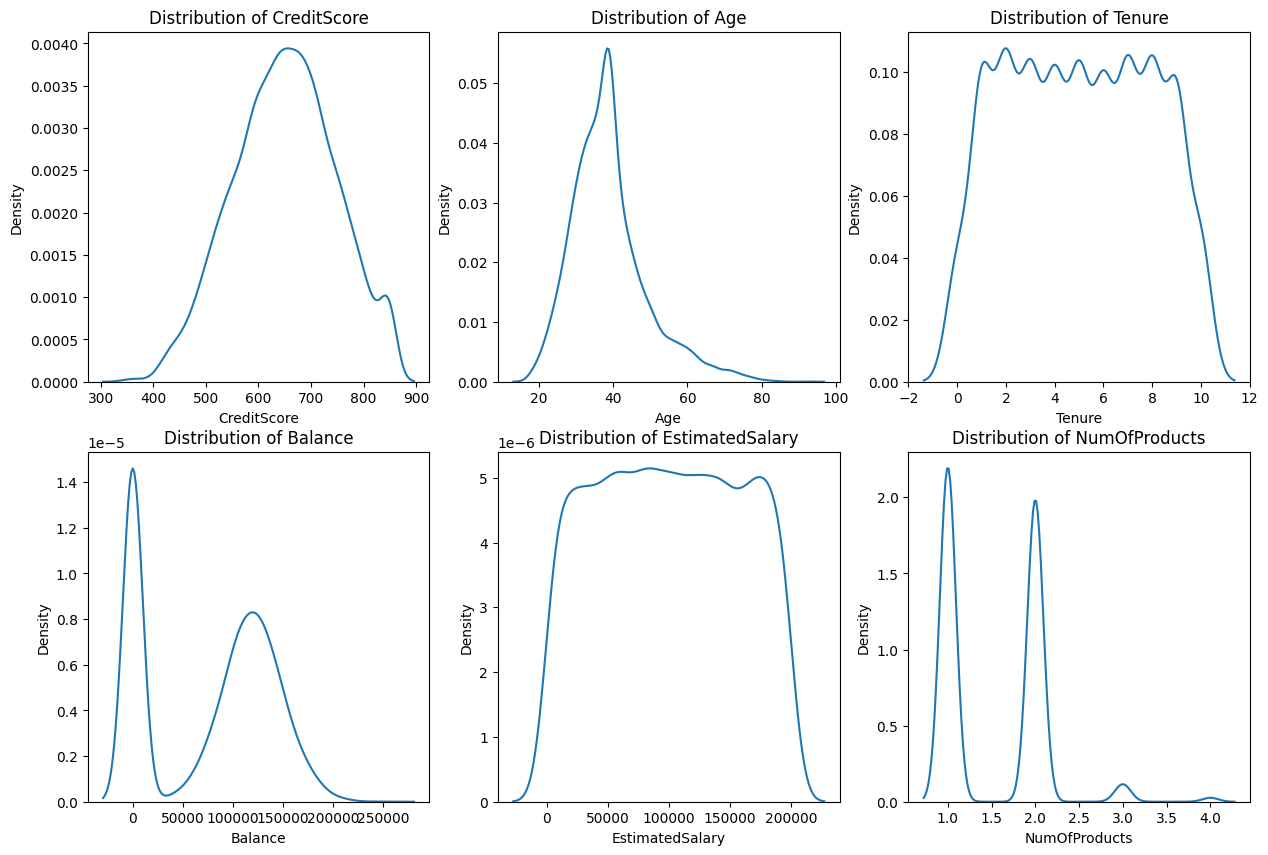

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(data = df[col], ax = axes[idx])
    axes[idx].set_title(f'Distribution of {col}')

plt.show()

In [ ]:
#Here we can see numOfProducts is a categorical variable, so we can convert it to categorical variable
#Because it has only 3 unique values. they should be integers. so exactly vlaues are 1,2,3.